<a href="https://colab.research.google.com/github/sidms24/internship/blob/main/week%205/strain_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!wget -O "sequences.csv" https://raw.githubusercontent.com/sidms24/internship/refs/heads/main/week%205/sequences.csv?token=GHSAT0AAAAAADFXXNIIRVNRGGBP7RYDRAFO2DNHJIA

--2025-07-08 15:32:45--  https://raw.githubusercontent.com/sidms24/internship/refs/heads/main/week%205/sequences.csv?token=GHSAT0AAAAAADFXXNIIRVNRGGBP7RYDRAFO2DNHJIA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 434322 (424K) [text/plain]
Saving to: ‘sequences.csv’

sequences.csv       100%[===================>] 424.14K  --.-KB/s    in 0.05s   

2025-07-08 15:32:46 (9.07 MB/s) - ‘sequences.csv’ saved [434322/434322]



In [ ]:
seq = pd.read_csv("sequences.csv")
seq.columns
seq.isna().sum()
s = seq.drop(columns = ['Isolate', 'Tissue_Specimen_Source'], axis = 1)

In [ ]:
s['Collection_Date'] = pd.to_datetime(s['Collection_Date'], errors='coerce')
s['Release_Date'] = pd.to_datetime(s['Release_Date'] )

def get_season(date):
  if date.month >= 9:
    return f"{date.year}/{str(date.year + 1)[-2:]}"
  elif date.month <= 8:
    return f"{date.year - 1}/{str(date.year)[-2:]}"
  else:
    return np.nan

s['season'] = s['Collection_Date'].apply(get_season)

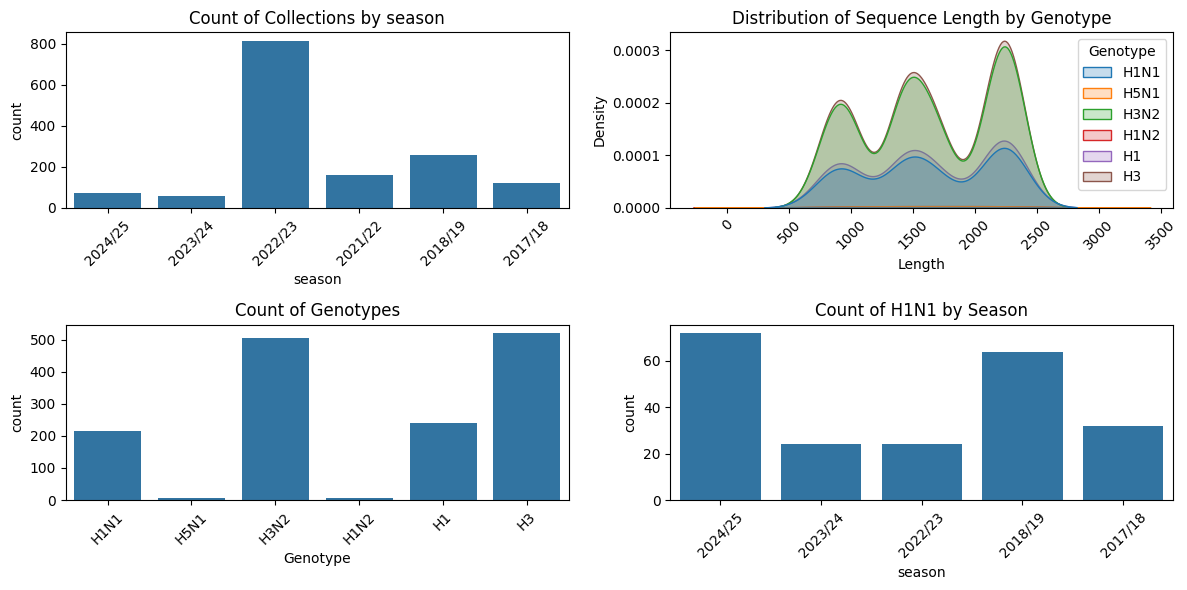

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.countplot(data=s, x='season', ax=axes[0, 0])
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_title('Count of Collections by season')

sns.kdeplot(data=s, x='Length', hue='Genotype', fill=True, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Distribution of Sequence Length by Genotype')

sns.countplot(data=s, x='Genotype', ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_title('Count of Genotypes')

sns.countplot(data=s[s["Genotype"] == "H1N1" ], x='season', ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_title('Count of H1N1 by Season')

plt.tight_layout()
plt.show()

In [ ]:
seg = s[['Accession','Genotype', 'Segment','Length', 'Collection_Date', 'season']]

In [ ]:
seg = seg.sort_values(by = ["Accession"], ascending= False).reset_index(drop = True)
seg = seg.groupby('Accession', group_keys=False).apply(lambda x: x.sort_values(by='Segment'))


In [ ]:
seg.to_csv('cleaned_data.csv')